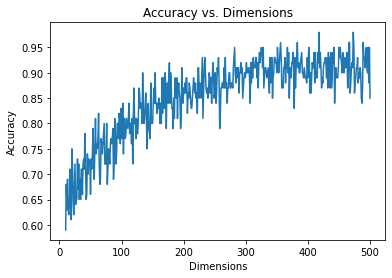

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(d):
    return np.random.randn(n,d)

def emprical_mean(X):
    return np.mean(X, axis=0)

def get_max_threshold(X,Y,mu):
    thresholds = np.linspace(-1,3,500)
    n = len(X)
    max_correct = -1
    for t in thresholds:
        correct = np.sum(X@mu>=t) + np.sum(Y@mu<t)
        max_correct = max(max_correct, correct)
        if max_correct==correct:
            best_threshold = t
    max_accuracy = max_correct/(2*n)
    return max_accuracy, best_threshold


n = 50
accuracies = []
thresholds = []
for d in range(10, 501):
    X = generate_data(d)
    Y = generate_data(d)
    mu = emprical_mean(X)
    acc, t = get_max_threshold(X,Y,mu)
    accuracies.append(acc)
    thresholds.append(t)

dimensions = np.linspace(10,500,491)
plt.plot(dimensions, accuracies)
plt.xlabel('Dimensions')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Dimensions')
plt.show()

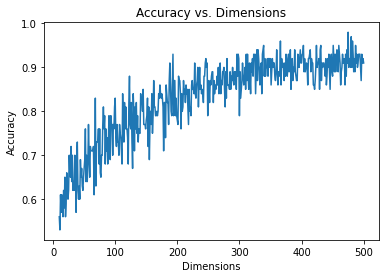

In [2]:
# compute accuracy using the thresholds found in the previous part. 
def calc_accuracy(X,Y,t):
    n = len(X)
    correct = np.sum(X>=t) + np.sum(Y<t)
    return correct/(2*n)

n = 50
accuracies = []
for d in range(10, 501):
    X = generate_data(d)
    Y = generate_data(d)
    mu = emprical_mean(X)
    acc = calc_accuracy(X@mu, Y@mu, thresholds[d-10])
    accuracies.append(acc)

dimensions = np.linspace(10,500,491)
plt.plot(dimensions, accuracies)
plt.xlabel('Dimensions')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Dimensions')
plt.show()

In [4]:
d = 50
X = generate_data(d)
Y = generate_data(d)
mu = emprical_mean(X)
sigmas = np.linspace(0,1,100)
repeated_mus = []
repeated_accs = []
for i in range(1000):
    mus = []
    accuracies = []
    for sigma in sigmas:
        mu_tilde = mu + np.random.normal(0,np.sqrt(sigma))
        mu_norm = np.linalg.norm(mu_tilde)
        mus.append(mu_norm)
        accuracy, t = get_max_threshold(X,Y,mu_tilde)
        accuracies.append(accuracy)
    repeated_mus.append(mus)
    repeated_accs.append(accuracies)

avg_mus = np.mean(repeated_mus, axis=0)
avg_accs = np.mean(repeated_accs, axis=0)

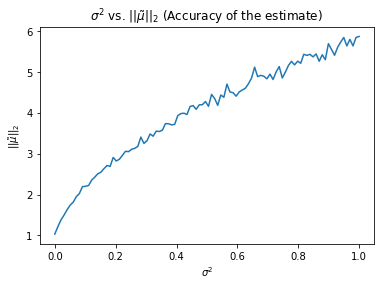

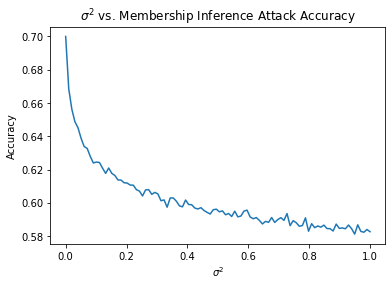

In [5]:
plt.plot(sigmas, avg_mus)
plt.xlabel('$\sigma^2$')
plt.ylabel(r'$\||\tilde{\mu}\||_2$')
plt.title(r'$\sigma^2$ vs. $\||\tilde{\mu}\||_2$ (Accuracy of the estimate)')
plt.show()

plt.plot(sigmas, avg_accs)
plt.xlabel('$\sigma^2$')
plt.ylabel('Accuracy')
plt.title(r'$\sigma^2$ vs. Membership Inference Attack Accuracy')
plt.show()